# This is a Notebook to test hypothesis with bootstrap!

In [1]:
from numpy import *   #ones, cumsum, sum, isscalar
from matplotlib.pylab import * 
%matplotlib inline
import pickle
from bootstrap import  btset, dataset, dataset_cd, btset_cd, generateplots, ap

In [123]:
from scipy.integrate import simps

In [2]:
# These are the ways we will call the bootstrap sets
nsp = 500
dis = btset_cd(cd='DiS',size=nsp)
sis = btset_cd(cd='SiS',size=nsp)
sps = btset_cd(cd='Sp',size=nsp)

dataf = {
"inh shaft": (-2.01288, 0.606754),
"SiS": {
"Dss": (248, 1.0),
"Vh": (-2.84134 , 0.943684),
"A1": (-0.2329858,0.41,1.0),
"Ah": (-0.9274113,1.32,0.66666666667),
"Rh":  (1.92772, 0.604723),
"Rn":(4.03436, 1.00208)
},
"DiS": {
"Dss": (248, 1.0),
"Vh": (-2.0554,0.742202),
"A1": (-0.2329858,0.41,1.0),
"Ah": (-0.9274113,1.32,0.66666666667),
"Rh": (1.59667,0.436302),  
"Rn": (3.89941,1.13159),
"A2": ( -2.54262,0.531551)
},
}
nsp = 500
p = dataf["inh shaft"]
iPSDsh = exp(randn(nsp)*p[1]+p[0])
iPSDsh = exp(randn(nsp)*p[1]+p[0])
#figure()
#h = hist(iPSDsh,31)
#xlabel("iPSD shaft ($\mu m^2$)",fontsize=14)


# H1: Given a head Volume, are DiS synapse larger?

First we need to know the limits of our data, minimums and maximums to make search in volume!

In [147]:
dis = dataset_cd(cd='DiS',noise = 0.)
sis = dataset_cd(cd='SiS',noise = 0.)
#generateplots(dis,corplot = True)

[1.31772004 0.01497416] [1.21798967 0.03451476]
1.3977332574732717 1.3675702174159987


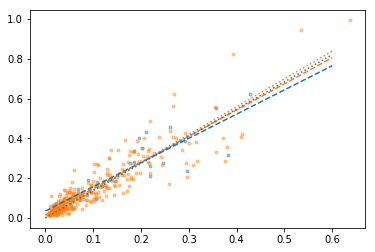

In [153]:
plot(dis['Vh'],dis['A1'],'.',alpha=0.4)
plot(sis['Vh'],sis['A1'],'.',alpha=0.4)
pS = polyfit(sis['Vh'],sis['A1'],1)
pD = polyfit(dis['Vh'],dis['A1'],1)
print(pS,pD)
xs = linspace(0,0.6,3)
plot(xs,xs*pS[0]+pS[1],'C1--')
plot(xs,xs*pD[0]+pD[1],'C0--')
aS = sum(sis['A1']*sis['Vh'])/sum(sis['Vh']**2)
aD = sum(dis['A1']*dis['Vh'])/sum(dis['Vh']**2)

print(aS,aD)

plot(xs,xs*aS,'C1:')
plot(xs,xs*aD,'C0:')

In [8]:
dVhlm = (dis['Vh'].min(),dis['Vh'].max())
dA1lm = (dis['A1'].min(),dis['A1'].max())
sVhlm = (sis['Vh'].min(),sis['Vh'].max())
sA1lm = (sis['A1'].min(),sis['A1'].max())
Vhlm = (max(dVhlm[0],sVhlm[0]),min(dVhlm[1],sVhlm[1]))
A1lm = (max(dA1lm[0],sA1lm[0]),min(dA1lm[1],sA1lm[1]))
print(Vhlm,A1lm)

(0.022735161025235234, 0.4272108964152264) (0.0300835, 0.623959)


In [115]:
np = 101
dV = (Vhlm[1]-Vhlm[0])/(np-1)
Vs = linspace(Vhlm[0],Vhlm[1],np)
Vs2 = linspace(Vhlm[0],Vhlm[1],np)+dV
Vss = array(list(zip(Vs,Vs2)))
print(Vss.shape)
pA_DgS = zeros((np,6)) 
dA_DgS = zeros((np,5)) 

df = array([0.,0.,0.,0.])
pf = array([0.,0.,0.])

for i in range(1000):
    nsp = 1000
    dis = btset_cd(cd='DiS',size=nsp)
    sis = btset_cd(cd='SiS',size=nsp)
    dVh = dis['Vh']
    sVh = sis['Vh']
    dA1 = dis['A1']
    sA1 = sis['A1']
    for ip in range(np-1):
        seld = (dVh>=Vss[ip,0])*(dVh<Vss[ip,1])
        sels = (sVh>=Vss[ip,0])*(sVh<Vss[ip,1])
        selds = seld.sum()
        selss = sels.sum()
        if selss*selds>0:
            pA_DgS[ip,1] += 1.0*(dA1[seld].mean()>sA1[sels].mean())
            pA_DgS[ip,2] += 1.0
            pA_DgS[ip,3] += 1.0*(dVh[seld].mean()>sVh[sels].mean())
            pA_DgS[ip,4] += selds.sum()
            pA_DgS[ip,5] += selss.sum()

            dA_DgS[ip,1] += (dA1[seld].mean()-sA1[sels].mean())
            dA_DgS[ip,2] += 1.0
            dA_DgS[ip,3] += (dVh[seld].mean()-sVh[sels].mean())
            dA_DgS[ip,4] += (dA1[seld].mean()-sA1[sels].mean())**2

            df[0] += (dA1[seld].mean()-sA1[sels].mean())
            df[1] += 1
            df[2] += (dVh[seld].mean()-sVh[sels].mean())
            df[3] += (dA1[seld].mean()-sA1[sels].mean())**2

    pf[0] += (dA1.mean()>sA1.mean())
    pf[1] += 1
    pf[2] += (dVh.mean()>sVh.mean())
    
    if i%100== 0: print(i)

pA_DgS[:,0] = Vs+dV/2.0
dA_DgS[:,0] = Vs+dV/2.0

(101, 2)
0
100
200
300
400
500
600
700
800
900


0.5507096923700828 0.002526058369599559


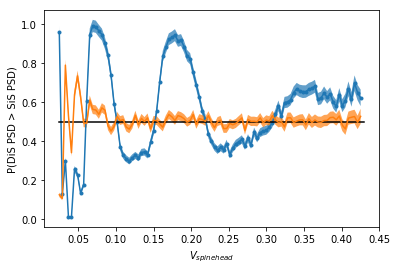

In [146]:
sel = pA_DgS[:,2]>0
plot(pA_DgS[sel,0],pA_DgS[sel,1]/pA_DgS[sel,2],'.-')
xm,xs = pA_DgS[sel,1]/pA_DgS[sel,2],sqrt(pA_DgS[sel,1])/pA_DgS[sel,2]
fill_between(pA_DgS[sel,0],xm-xs,xm+xs,alpha=0.7)
plot(pA_DgS[:,0],pA_DgS[:,0]*0+.5,'k')
plot(pA_DgS[sel,0],pA_DgS[sel,3]/pA_DgS[sel,2])
xm,xs = pA_DgS[sel,3]/pA_DgS[sel,2],sqrt(pA_DgS[sel,3])/pA_DgS[sel,2]
fill_between(pA_DgS[sel,0],xm-xs,xm+xs,alpha=0.7)
xlabel('$V_{spine head}$')
ylabel('P(DiS PSD > SiS PSD)')

#plot(pA_DgS[sel,0],pA_DgS[sel,4]/pA_DgS[sel,4].sum()/dV/9,'--')
#plot(pA_DgS[sel,0],pA_DgS[sel,5]/pA_DgS[sel,5].sum()/dV/9,'--')
#plot(pA_DgS[sel,0],pA_DgS[sel,4]*pA_DgS[sel,5]/(pA_DgS[sel,4]*pA_DgS[sel,5]).sum()/dV/9,'k--')

print(pA_DgS[sel,1].sum()/pA_DgS[sel,2].sum(),sqrt(pA_DgS[sel,1].sum())/pA_DgS[sel,2].sum())

0.4443302087672964

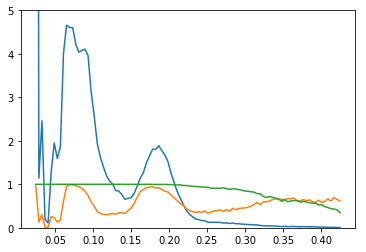

In [145]:
sel0 = arange(len(sel))[sel][:]
rho = pA_DgS[sel0,4]*pA_DgS[sel0,5]/(pA_DgS[sel0,4]*pA_DgS[sel0,5]).sum()/dV
pDS = pA_DgS[sel0,1]/pA_DgS[sel0,2]
plot(pA_DgS[sel0,0],rho*pDS)
plot(pA_DgS[sel0,0],pDS)
plot(pA_DgS[sel0,0],pA_DgS[sel0,2]/1000.0)

ylim(0,5)
simps(pDS*rho,pA_DgS[sel0,0])

Text(0, 0.5, 'A')

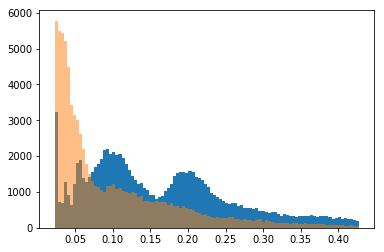

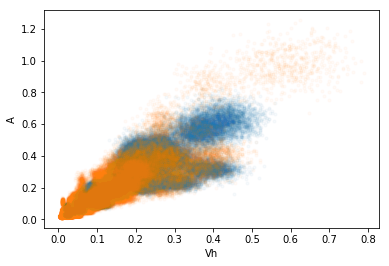

In [107]:
nsp = 100000
dis = btset_cd(cd='DiS',size=nsp)
sis = btset_cd(cd='SiS',size=nsp)
h = hist(dis['Vh'],bins=Vs)
h = hist(sis['Vh'],bins=Vs,alpha=0.5)
figure()
plot(dis['Vh'],dis['A1'],'.',alpha=0.03)
plot(sis['Vh'],sis['A1'],'.',alpha=0.03)
xlabel('Vh')
ylabel('A')

Average difference in area 0.0030 um^2 


Text(0, 0.5, 'DiS PSD - SiS PSD')

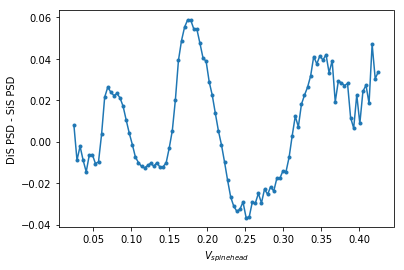

In [165]:
sel = dA_DgS[:,2]>0
plot(dA_DgS[sel,0],dA_DgS[sel,1]/dA_DgS[sel,2],'.-')
#xm,xs = dA_DgS[sel,1]/dA_DgS[sel,2],sqrt(pA_DgS[sel,1])/pA_DgS[sel,2]

sel0 = arange(len(sel))[sel][:]
rho = pA_DgS[sel0,4]*pA_DgS[sel0,5]/(pA_DgS[sel0,4]*pA_DgS[sel0,5]).sum()/dV
dDS = dA_DgS[sel0,1]/dA_DgS[sel0,2]
#plot(pA_DgS[sel0,0],rho*pDS)
print('Average difference in area %.4f um^2 ' % simps(dDS*rho,dA_DgS[sel0,0]))
#fill_between(pA_DgS[sel,0],xm-xs,xm+xs,alpha=0.7)
#plot(pA_DgS[:,0],pA_DgS[:,0]*0+.5,'k')
#plot(dA_DgS[sel,0],dA_DgS[sel,2]/dA_DgS[sel,2].sum())
#plot(dA_DgS[sel,0],dA_DgS[sel,3]/dA_DgS[sel,2])
#xm,xs = pA_DgS[sel,3]/pA_DgS[sel,2],sqrt(pA_DgS[sel,3])/pA_DgS[sel,2]
#fill_between(pA_DgS[sel,0],xm-xs,xm+xs,alpha=0.7)
xlabel('$V_{spine head}$')
ylabel('DiS PSD - SiS PSD')
#print(pA_DgS[sel,1].sum()/pA_DgS[sel,2].sum(),sqrt(pA_DgS[sel,1].sum())/pA_DgS[sel,2].sum())